<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_08_Prueba_de_huecos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Realiza prueba de independencia de una secuencia de datos pseudoaleatorio.

# Descripción

* Se cargan librerías.
* Se crear los datos a parir de una lista de números que puede ser números generados de manera aleatoria o que provienen de una muestra aleatoria.
* Se genera secuencia de 0's y 1's y se determinan los huecos.
* Se construye una tabla de frecuencia con la frecuencia de valores que hay de cada hueco. ses determina la freuencia de ¿cuántos huecos de 0?, ¿cuántos de 1?, ¿cúantos de 2? así sucesivamente.
* Se construye la tabla de frecuencia con los valores observados, esperados y chi cuadrada en relación los huecos de la secuencia.
* Se determinan las sumatorias
* Se establece el valor de alfa de significancia.
* Se establece hipótesis nula $H_0$  y alternativa $H_a$.

$$
H_0: \text{Los datos SI son independientes}
$$

$$
H_a: \text{Los datos NO son independientes}
$$
* Se contrasta el valor calculado de chi cuadrada calcuadi que debe ser menor en relción a el valor chi cuadrada de prueba determinado por la distribución chi cuadrada por la derecha.

* Si es menor el valor chi cuadrada calculado contra el valor de prueba chi se acepta $H_0$ de lo contrario se rechaza $H_0$**.

* De acuerdo al contraste se toma la decisión de aceptar la $H_0$ de si los datos son independientes o no son independientes.




# Conceptos

La independencia de los datos es un concepto fundamental en estadísticas y análisis de datos que se refiere a la falta de relación o dependencia entre las observaciones o eventos.

Existen diversar puebas estadísticas como las pruebas de póker, prueba de corrida arriba abajo, prueba de series, prueba de huecos entre otros que se utilizan para identificar independencia o no de los datos y que ayudan a la interpretación de los resultados con precisión.

La independencia de datos es un concepto estadístico y puede depender del contexto de los datos, de la muestra y de los análisis específicos.

Datos Independientes: Cuando los datos son independientes, significa que la ocurrencia o valor de un evento o punto no está influenciado por los otros eventos o puntos en el conjunto de datos. En otras palabras, no hay relación causal o dependencia entre las observaciones. Cada observación se considera un evento aislado y no afecta ni está influenciada por las demás.

Datos No Independientes: Si los datos no son independientes, implica que existe algún tipo de relación o dependencia entre las observaciones. Esto puede manifestarse en diferentes formas, tal vez detectando algún patrón que indica que las observaciones no son eventos aislados y se ven afectados por otros.

En el contexto de las pruebas de huecos, se asume la independencia espacial, lo que significa que la ocurrencia de un evento en una ubicación no afecta la ocurrencia de eventos en otras ubicaciones. Si los datos son independientes, se espera que los huecos se distribuyan de manera aleatoria en el espacio.

En el contexto de las pruebas de póker, la independencia es fundamental para evaluar si las manos son aleatorias o si muestran patrones específicos de dependencia. Por ejemplo, en una mano de póker, se asume que las cartas se barajan de manera aleatoria y que no hay dependencia entre las cartas que se reparten.

En resumen, la independencia de los datos es un supuesto importante en muchas pruebas estadísticas, ya que permite realizar inferencias válidas sobre las distribuciones y patrones observados.

Cuando se sospecha que los datos no son independientes, es necesario considerar otros métodos y análisis específicos.

Las pruebas de independencia de datos se contrasatan contra el valor estadístico de prueba de *chi cuadrada* cola a la derecha.

La funcion en Python que devuelve el estadístico de prueba es *chi2.ppf(1 - alfa_significancia, df=grados de libertdad)*


## Restricciones prueba de huecos

$$
\text{Los datos pseudoaleatorios deben ser entre 0 y 1; r ∈(0,1)}
$$

$$
\text{ el intervalo o rango se define entre α y β };(\alpha, \beta)
$$

$$
\text{ α debe ser menor que β}; (\alpha < \beta)
$$

$$
(α, β) ∈ (0, 1)
$$

$$
S_=
\begin{cases}
0, \text{si r ∉(α, β)};\\
1, \text{si r ∈(α, β)}
\end{cases}
$$

# Desarrollo

## Librerías


In [80]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt

## Crear funciones



In [81]:
def f_secuencia(numeros, li, ls):
  # Crea la secuencia binaria
  secuencia = np.where((datos >= li) & (datos <= ls), 1, 0)
  return secuencia

def f_huecos(secuencia):
  huecos = 0
  cuantos_ceros = []
  n = len(secuencia)
  # Contar los huecos
  i = 0
  while i < (n - 1):
    if secuencia[i] == 1:
        huecos += 1
        j = i + 1
        ceros = 0
        while j < n and secuencia[j] == 0:
            ceros += 1
            j += 1
        cuantos_ceros.append(ceros)
    i += 1
  return huecos, cuantos_ceros
# print("Número de huecos entre unos consecutivos:", huecos)
# print("Cuántos ceros")
# print(cuantos_ceros)

def f_tabla_frec_huecos (cuantos_ceros, li, ls):
  huecos = len (cuantos_ceros)
  # Determina los valores mínimo y máximo en cuantos_ceros
  minimo_huecos = min(cuantos_ceros)
  maximo_huecos = max(cuantos_ceros) + 1

  # Crea una lista de rango desde 0 hasta 4
  rango = list(range(maximo_huecos+1))

  # Crea un diccionario para contar la frecuencia de cada número
  frecuencia = {valor: cuantos_ceros.count(valor) for valor in rango}

  # Crea un DataFrame a partir del diccionario
  tabla = pd.DataFrame(list(frecuencia.items()), columns=['Xi', 'Frec_Oi'])

  # Ordenar la tabla de frecuencias por el número de ceros Xi:
  tabla = tabla.sort_values(by='Xi')

  # Calcular Frec_Ei
  alfa = li
  beta = ls
  h = huecos

  Frec_Ei = []
  for i in range(maximo_huecos+1):
    #print (i)
    if i < maximo_huecos:
      Frec_Ei.append(h * (beta - alfa) * (1 - (beta - alfa)) ** i)
    else:
      Frec_Ei.append(h * (1 - (beta - alfa)) ** i)

  tabla['Frec_Ei'] = Frec_Ei

  tabla['chi_cuad'] = (tabla['Frec_Ei'] - tabla['Frec_Oi']) ** 2 / (tabla['Frec_Ei'])
  # Calcular el valor Esperado Frec_Ei

  # Las sumatorias:
  suma_Ei = sum(tabla['Frec_Ei'])
  suma_Oi = sum(tabla['Frec_Oi'])
  suma_chi_cuad = sum(tabla['chi_cuad'])
  print ("Suma de Ei", suma_Ei)
  print ("Suma de Oi", suma_Ei)
  print ("Suma de chi_cuadi", suma_chi_cuad)
  return tabla, suma_chi_cuad

def f_visualizar_chi_prueba_independencia (datos, suma_chi_cuad, valor_prueba_chi, gl, alfa):
  x = np.linspace(np.min(datos), np.max(datos) * 10, 1000)
  pdf = chi2.pdf(x, df = gl)
  # alfa = 0.05

  # Visualizar
  plt.figure(figsize=(10, 6))
  plt.plot(x, pdf, label=f'Chi-cuadrado ({gl} grados de libertad)')
  plt.axvline(x = suma_chi_cuad, color='green', linestyle='--', label=f'Suma Chi cuadrada calculada  = {suma_chi_cuad}')
  plt.axvline(x = valor_prueba_chi, color='red', linestyle='--', label=f'Estadístico Chi-cuadrado = {valor_prueba_chi}')

  # Agregar un sombreado en el área de rechazo
  x_rechazo = np.linspace(chi2.ppf(1 - alfa, df=gl), 30, 1000)
  plt.fill_between(x_rechazo, chi2.pdf(x_rechazo, df=gl), color='red', alpha=0.2, label=f'Área de Rechazo (alfa = {alfa})')

  # Etiquetas y leyenda
  plt.xlabel('Valor de Chi-cuadrado')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend()

  # Mostrar el resultado en el gráfico
  plt.annotate(decision, xy=(1, 0.1), fontsize=12, color='blue')
  plt.title('Distribución Chi-cuadrado y Resultado de Prueba')

  # Mostrar el gráfico
  plt.show()



## Cargar o crear datos presudoaleatorios

In [82]:

# Los datos
datos = np.array([0.7, 0.08, 0.29, 0.04, 0.33, 0.93, 0.04, 0.06, 0.4, 0.72,
                  0.19, 0.21, 0.01, 0.53, 0.73, 0.99, 0.76, 0.2, 0.39, 0.5,
                  0.02, 0.4, 0.33, 0.89, 0.57, 0.19, 0.63, 0.54, 0.49, 0.76,
                  0.19, 0.74, 0.34, 0.87, 0.46, 0.58, 0.81, 0.74, 0.06, 0.68,
                  0.12, 0.86, 0.87, 0.75, 0.53, 0.09, 0.1, 0.6, 0.05, 0.34])
print(datos)

[0.7  0.08 0.29 0.04 0.33 0.93 0.04 0.06 0.4  0.72 0.19 0.21 0.01 0.53
 0.73 0.99 0.76 0.2  0.39 0.5  0.02 0.4  0.33 0.89 0.57 0.19 0.63 0.54
 0.49 0.76 0.19 0.74 0.34 0.87 0.46 0.58 0.81 0.74 0.06 0.68 0.12 0.86
 0.87 0.75 0.53 0.09 0.1  0.6  0.05 0.34]


## Crear la secuencia de 0's y 1's

La secuencia se crea con base en los rangos con el valor de límite inferior y superior alfa y beta en término de la fórmula.

$$
alfa = \alpha = 0.3
$$

$$
beta = \beta = 0.8 \therefore
$$

$$
\alpha \text {, debe ser menor que }\beta
$$

$$
\alpha < \beta
$$


In [83]:
# Establece los umbrales
li = 0.3
ls = 0.8

# Crea la secuencia binaria
secuencia = f_secuencia(datos, li, ls )

n = len(secuencia)
print(n)
print(secuencia)
#print(np.array(secuencia).reshape(5, 10))


50
[1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 0 0 1 1 0 0 1 0 1]


## Contar los 0's y 0's para determinar frecuencias

In [84]:
huecos, cuantos_ceros, = f_huecos(secuencia)
print("Número de huecos entre unos consecutivos:", huecos)
print("Cuántos y como están la frecuencia de huecos ceros")
print(cuantos_ceros)

Número de huecos entre unos consecutivos: 25
Cuántos y como están la frecuencia de huecos ceros
[3, 3, 0, 3, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 3, 0, 2, 1]


## Crear tabla de frecuencias

Se crea la tabla de frecuencias con los valores observados y esperados

El último registro se refiere a que la frecuencia esperada sea mayr o igual que el valor de $X_i$.

$$
Ei = h \cdot (\beta - \alpha) \cdot [1 - (\beta - \alpha)]^i
$$

$$
\chi^{2}_{o} = \frac{(Ei - Oi)^2}{Ei}
$$

In [85]:
tabla, suma_chi_cuad = f_tabla_frec_huecos(cuantos_ceros, li, ls)
print(tabla)
print ("Suma de chi_cuadi", suma_chi_cuad)


Suma de Ei 25.0
Suma de Oi 25.0
Suma de chi_cuadi 9.56
   Xi  Frec_Oi  Frec_Ei  chi_cuad
0   0       10  12.5000    0.5000
1   1       10   6.2500    2.2500
2   2        1   3.1250    1.4450
3   3        4   1.5625    3.8025
4   4        0   1.5625    1.5625
Suma de chi_cuadi 9.56


## Constrastar chi cuadrada

Contrastar el valor de chi cuadrada calculado contra el valor de chi cuadrada de acuerdo con el valor de significanacia de alfa cola a la derecha de la distribucón chi cuadrada

In [86]:

# Calcular el etadístico de prueba de chi cuadrada
confianza = 0.95
alfa_significancia = 1 - confianza

gl = intervalos = len(tabla) - 1 # Par ael valor de grados de libertad
valor_prueba_chi = chi2.ppf(1 - alfa_significancia, df=gl)
print("valor_prueba_chi:", valor_prueba_chi)

# Realizar el contraste
H0 = "Los datos son independientes"
Ha = "Los datos no son independientes"

if suma_chi_cuad < valor_prueba_chi:
    decision = f"Se acepta H0. {H0}"
else:
    decision = f"Se rechaza H0 y se acepta Ha. {Ha}"

print(decision)


valor_prueba_chi: 9.487729036781154
Se rechaza H0 y se acepta Ha. Los datos no son independientes


## Visualizando prueba

Solo mandar llamar la función de visualizar


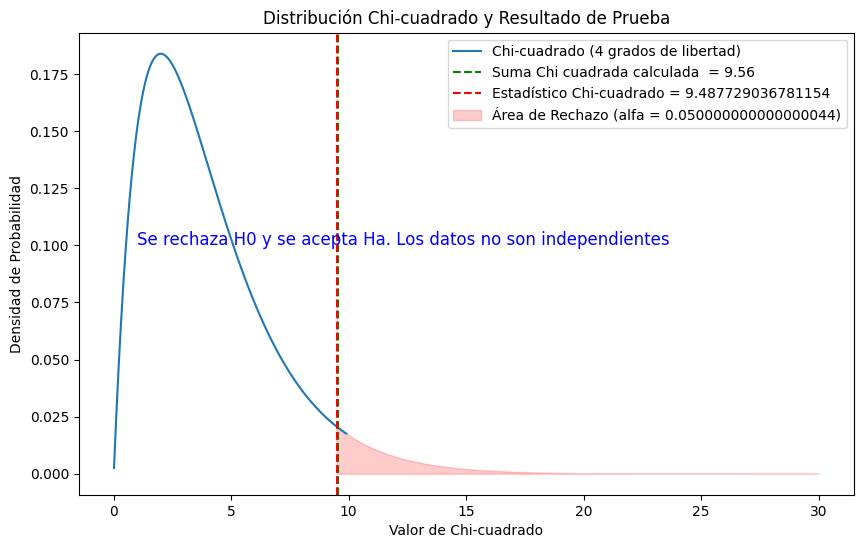

In [87]:

f_visualizar_chi_prueba_independencia(datos, suma_chi_cuad, valor_prueba_chi, gl, alfa_significancia)


## Otros datos


[0.5 0.1 0.3 0.2 0.4 0.7 0.6 0.9 0.8 0.6 0.5]
11
[1 0 1 0 1 1 1 0 1 1 1]
Número de huecos entre unos consecutivos: 7
Cuántos y como están la frecuencia de huecos ceros
[1, 1, 0, 0, 1, 0, 0]
Suma de Ei 7.0
Suma de Oi 7.0
Suma de chi_cuadi 2.7142857142857144
   Xi  Frec_Oi  Frec_Ei  chi_cuad
0   0        4     3.50  0.071429
1   1        3     1.75  0.892857
2   2        0     1.75  1.750000
Suma de chi_cuadi 2.7142857142857144
valor_prueba_chi: 5.991464547107979
Se acepta H0. Los datos son independientes


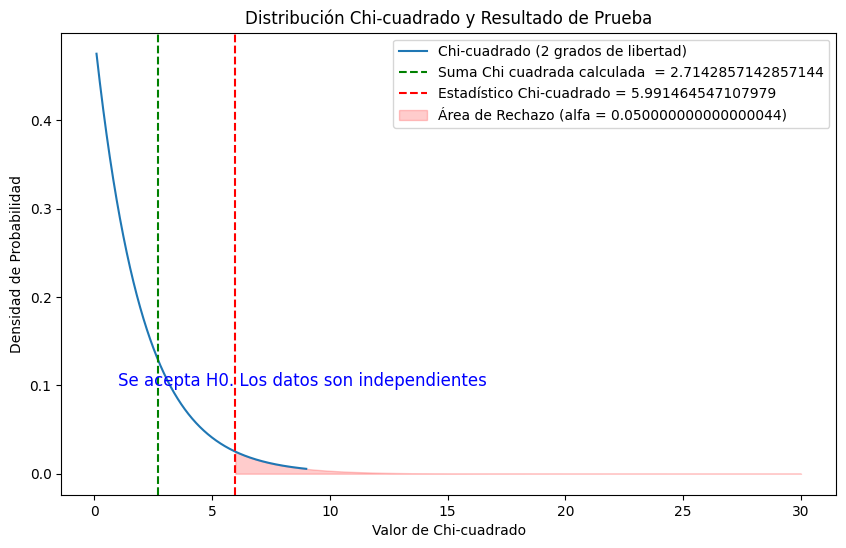

In [89]:
datos = np.array([0.5, 0.1, 0.3, 0.2, 0.4, 0.7, 0.6, 0.9, 0.8, 0.6, 0.5])
print(datos)


# Establece los umbrales, li ls
li = 0.3
ls = 0.8

# Crea la secuencia binaria
secuencia = f_secuencia(datos, li, ls )
n = len(secuencia)
print(n)
print(secuencia)

# Huecos
huecos, cuantos_ceros, = f_huecos(secuencia)
print("Número de huecos entre unos consecutivos:", huecos)
print("Cuántos y como están la frecuencia de huecos ceros")
print(cuantos_ceros)

# Tabla
tabla, suma_chi_cuad = f_tabla_frec_huecos(cuantos_ceros, li, ls)
print(tabla)
print ("Suma de chi_cuadi", suma_chi_cuad)

# Calcular el etadístico de prueba de chi cuadrada
confianza = 0.95
alfa_significancia = 1 - confianza

gl = intervalos = len(tabla) - 1 # Par ael valor de grados de libertad
valor_prueba_chi = chi2.ppf(1 - alfa_significancia, df=gl)
print("valor_prueba_chi:", valor_prueba_chi)

# Realizar el contraste
H0 = "Los datos son independientes"
Ha = "Los datos no son independientes"

if suma_chi_cuad < valor_prueba_chi:
    decision = f"Se acepta H0. {H0}"
else:
    decision = f"Se rechaza H0 y se acepta Ha. {Ha}"

print(decision)

f_visualizar_chi_prueba_independencia(datos, suma_chi_cuad, valor_prueba_chi, gl, alfa_significancia)



# Otros datos dia 03-oct-2023

Realizar la prueba de huecos

[0.76 0.77 0.84 0.81 0.92 0.84 0.96 0.82 0.77 0.85 0.8  0.8  0.85 0.9
 0.89 0.85 0.95 0.82 0.89 0.86 0.88 0.84 0.86 0.78 0.8  0.93 0.81 0.84
 0.87 0.83 0.87 0.87 0.92 0.83 0.9  0.88 0.88 0.92 0.81 0.85 0.77 0.82
 0.89 0.91 0.86 0.89 0.8  0.81 0.86 0.85 0.82 0.84 0.97 0.83 0.84 0.82
 0.84 0.88 0.89 0.87 0.91 0.81 0.87 0.83 0.94 0.79 0.87 0.83 0.85 0.85
 0.87 0.85 0.84 0.9  0.85 0.8  0.82 0.83 0.83 0.85 0.79 0.91 0.91 0.86
 0.83 0.88 0.84 0.88 0.83 0.86 0.85 0.86 0.94 0.82 0.78 0.87 0.88 0.78
 0.88 0.83]
100
[0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1]
Número de huecos entre unos consecutivos: 43
Cuántos y como están la frecuencia de huecos ceros
[2, 1, 1, 2, 2, 1, 1, 1, 0, 4, 1, 3, 5, 1, 2, 3, 0, 0, 0, 1, 0, 0, 0, 6, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 1, 5]
Suma de Ei 43.0
Suma de Oi 43.0
Suma de chi_cuadi 268.6121

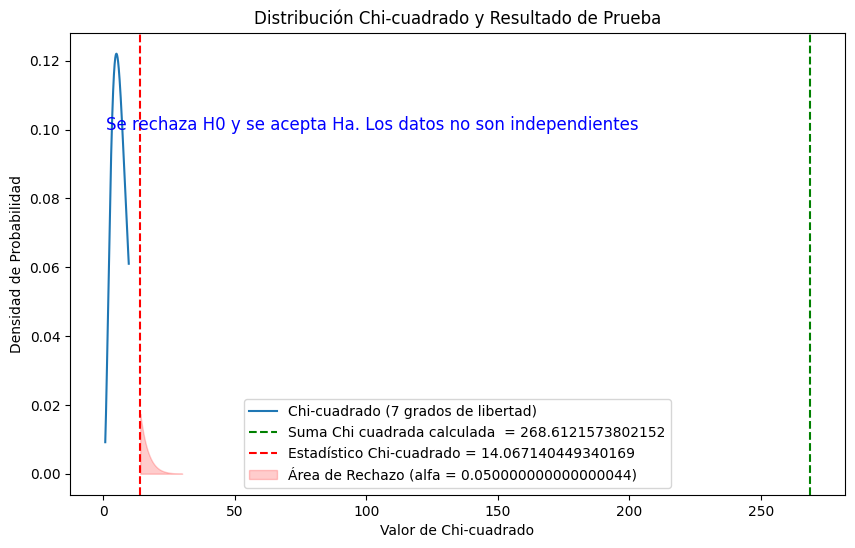

In [90]:
datos = np.array([76, 77, 84, 81, 92, 84, 96, 82, 77, 85,
         80, 80, 85, 90, 89, 85, 95, 82, 89, 86,
         88, 84, 86, 78, 80, 93, 81, 84, 87, 83,
         87, 87, 92, 83, 90, 88, 88, 92, 81, 85,
         77, 82, 89, 91, 86, 89, 80, 81, 86, 85,
         82, 84, 97, 83, 84, 82, 84, 88, 89, 87,
         91, 81, 87, 83, 94, 79, 87, 83, 85, 85,
         87, 85, 84, 90, 85, 80, 82, 83, 83, 85,
         79, 91, 91, 86, 83, 88, 84, 88, 83, 86,
         85, 86, 94, 82, 78, 87, 88, 78, 88, 83])

# Los datos deben ser entre 0 y 1
datos = datos / 100

print(datos)

# Establece los umbrales, li ls. Entre 0 y 1
li = 82 / 100
ls = 86 / 100

# Crea la secuencia binaria
secuencia = f_secuencia(datos, li, ls )
n = len(secuencia)
print(n)
print(secuencia)

# Huecos
huecos, cuantos_ceros, = f_huecos(secuencia)
print("Número de huecos entre unos consecutivos:", huecos)
print("Cuántos y como están la frecuencia de huecos ceros")
print(cuantos_ceros)

# Tabla
tabla, suma_chi_cuad = f_tabla_frec_huecos(cuantos_ceros, li, ls)
print(tabla)
print ("Suma de chi_cuadi", suma_chi_cuad)

# Calcular el etadístico de prueba de chi cuadrada
confianza = 0.95
alfa_significancia = 1 - confianza

gl = intervalos = len(tabla) - 1 # Par ael valor de grados de libertad
valor_prueba_chi = chi2.ppf(1 - alfa_significancia, df=gl)
print("valor_prueba_chi:", valor_prueba_chi)

# Realizar el contraste
H0 = "Los datos son independientes"
Ha = "Los datos no son independientes"

if suma_chi_cuad < valor_prueba_chi:
    decision = f"Se acepta H0. {H0}"
else:
    decision = f"Se rechaza H0 y se acepta Ha. {Ha}"

print(decision)

f_visualizar_chi_prueba_independencia(datos, suma_chi_cuad, valor_prueba_chi, gl, alfa_significancia)


# Otros datos edades dia 03-10-2023

Edades de personas tal vez no sean datos aleatorios entre 20 y 30 años

Estos datos tal vez presentan un patrón...


¿Los datos son independientes?
Verificar la construcción de las frecuencias



[0.22 0.24 0.26 0.28 0.3  0.21 0.22 0.23 0.24 0.25 0.22 0.24 0.26 0.28
 0.3  0.21 0.22 0.23 0.24 0.25 0.22 0.24 0.26 0.28 0.3  0.21 0.22 0.23
 0.24 0.25]
30
[1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
Número de huecos entre unos : 20
Cuántos y como están la frecuencia de huecos ceros
[0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0]
Suma de Ei 19.999999999999996
Suma de Oi 19.999999999999996
Suma de chi_cuadi 353.96565755208326
   Xi  Frec_Oi    Frec_Ei    chi_cuad
0   0       17   0.800000  328.050000
1   1        0   0.768000    0.768000
2   2        0   0.737280    0.737280
3   3        3   0.707789    7.423446
4   4        0  16.986931   16.986931
Suma de chi_cuadi 353.96565755208326
valor_prueba_chi: 9.487729036781154
Se rechaza H0 y se acepta Ha. Los datos no son independientes


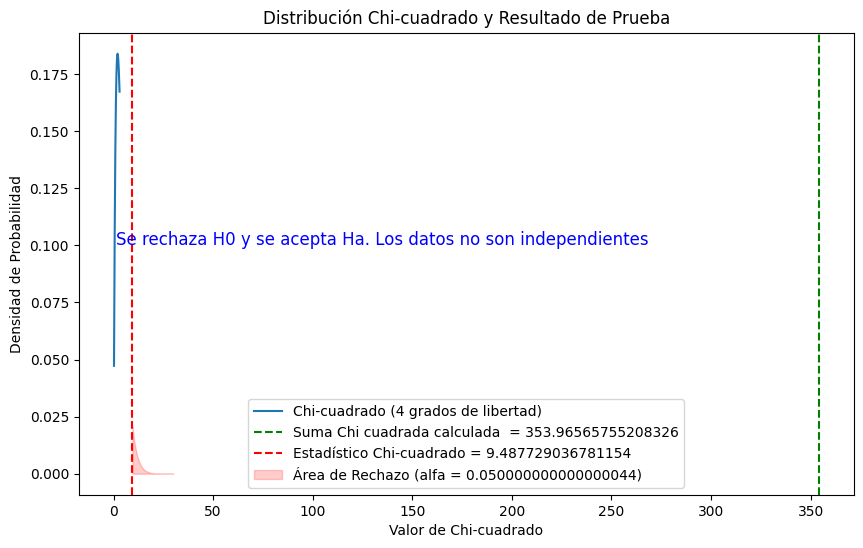

In [91]:
datos = np.array([22, 24, 26, 28, 30, 21, 22, 23, 24, 25, 22, 24, 26, 28, 30,
                  21, 22, 23, 24, 25, 22, 24, 26, 28, 30, 21, 22, 23, 24, 25])

datos = datos / 100  # valores entre 0 y 1
print(datos)

# Establece los umbrales, li ls entre 0 y 1
li = 22 / 100
ls = 26 / 100

# Crea la secuencia binaria
secuencia = f_secuencia(datos, li, ls )
n = len(secuencia)
print(n)
print(secuencia)

# Huecos
huecos, cuantos_ceros, = f_huecos(secuencia)
print("Número de huecos entre unos :", huecos)
print("Cuántos y como están la frecuencia de huecos ceros")
print(cuantos_ceros)

# Tabla
tabla, suma_chi_cuad = f_tabla_frec_huecos(cuantos_ceros, li, ls)
print(tabla)
print ("Suma de chi_cuadi", suma_chi_cuad)

# Calcular el estadístico de prueba de chi cuadrada
confianza = 0.95
alfa_significancia = 1 - confianza

gl = intervalos = len(tabla) - 1 # Par ael valor de grados de libertad
valor_prueba_chi = chi2.ppf(1 - alfa_significancia, df=gl)
print("valor_prueba_chi:", valor_prueba_chi)

# Realizar el contraste
H0 = "Los datos son independientes"
Ha = "Los datos no son independientes"

if suma_chi_cuad < valor_prueba_chi:
    decision = f"Se acepta H0. {H0}"
else:
    decision = f"Se rechaza H0 y se acepta Ha. {Ha}"

print(decision)

# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi_cuad, valor_prueba_chi, gl, alfa_significancia)


## Ejercicio para examen

El peso de cierto producto

Históricamente los pesos de cierto producto deben andar entre 400 y 800 miligramos (0.400 a 0.800 kgs), los datos tienen ese patrón que varía en ese peso de manera uniforme.

Embarque A: Se presume que este emarque si tiene ese patrón de comportamiento, uniforme y homogéneo.

Embarque B: Se presume que este embarque no tienen ese patrón de comportamiento, sus pesos fueron afectados por alguna causa.

$$
H_0:  \text{Los datos SI son independientes}
$$

$$
H_a:  \text{Los datos NO son independientes}
$$

Aquí la independencia de los datos se contextualiza que existen eventos aislados que afecan a la uniformidad de los datos.





## Embarque A:

0.735, 0.638, 0.739, 0.478, 0.799, 0.453, 0.674, 0.697, 0.501, 0.727, 0.509, 0.620, 0.645, 0.554, 0.421, 0.685, 0.500, 0.460, 0.680, 0.713, 0.632, 0.778, 0.431, 0.479, 0.742, 0.519, 0.489, 0.482, 0.540, 0.673, 0.481, 0.759, 0.424, 0.664, 0.794, 0.572, 0.599, 0.715, 0.455, 0.566, 0.534, 0.565, 0.756, 0.449, 0.796, 0.635, 0.435, 0.787, 0.455, 0.617

50
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Número de huecos entre unos : 49
Cuántos y como están la frecuencia de huecos ceros
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Suma de Ei 49.0
Suma de Oi 49.0
Suma de chi_cuadi 73.5
   Xi  Frec_Oi  Frec_Ei  chi_cuad
0   0       49     19.6      44.1
1   1        0     29.4      29.4
Suma de chi_cuadi 73.5
valor_prueba_chi: 3.841458820694124
Se rechaza H0 y se acepta Ha. Los datos no son independientes


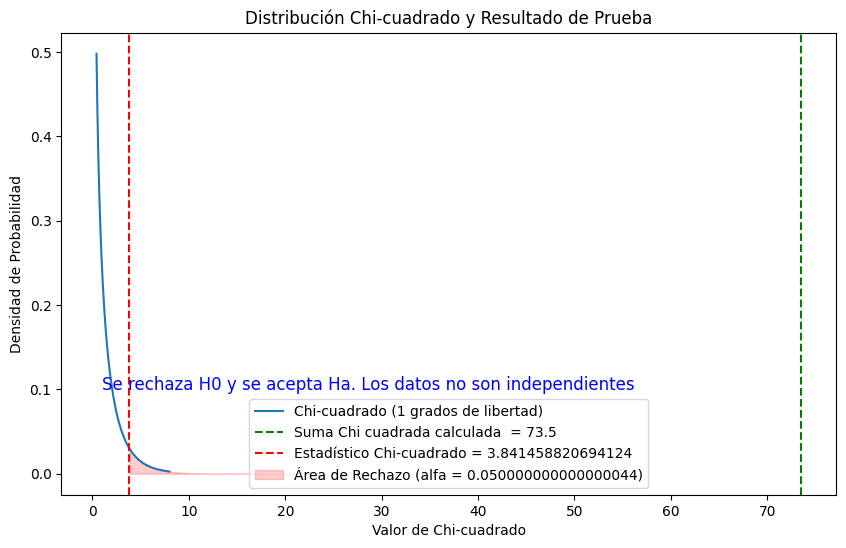

In [92]:
datos = np.array([0.735, 0.638, 0.739, 0.478, 0.799, 0.453, 0.674, 0.697, 0.501, 0.727,
                  0.509, 0.620, 0.645, 0.554, 0.421, 0.685, 0.500, 0.460, 0.680, 0.713,
                  0.632, 0.778, 0.431, 0.479, 0.742, 0.519, 0.489, 0.482, 0.540, 0.673,
                  0.481, 0.759, 0.424, 0.664, 0.794, 0.572, 0.599, 0.715, 0.455, 0.566,
                  0.534, 0.565, 0.756, 0.449, 0.796, 0.635, 0.435, 0.787, 0.455, 0.617])

datos

# Establece los umbrales, li ls entre 0 y 1
li = 0.400
ls = 0.800

# Crea la secuencia binaria
secuencia = f_secuencia(datos, li, ls )
n = len(secuencia)
print(n)
print(secuencia)

# Huecos
huecos, cuantos_ceros, = f_huecos(secuencia)
print("Número de huecos entre unos :", huecos)
print("Cuántos y como están la frecuencia de huecos ceros")
print(cuantos_ceros)

# Tabla
tabla, suma_chi_cuad = f_tabla_frec_huecos(cuantos_ceros, li, ls)
print(tabla)
print ("Suma de chi_cuadi", suma_chi_cuad)

# Calcular el estadístico de prueba de chi cuadrada
confianza = 0.95
alfa_significancia = 1 - confianza

gl = intervalos = len(tabla) - 1 # Par ael valor de grados de libertad
valor_prueba_chi = chi2.ppf(1 - alfa_significancia, df=gl)
print("valor_prueba_chi:", valor_prueba_chi)

# Realizar el contraste
H0 = "Los datos son independientes"
Ha = "Los datos no son independientes"

if suma_chi_cuad < valor_prueba_chi:
    decision = f"Se acepta H0. {H0}"
else:
    decision = f"Se rechaza H0 y se acepta Ha. {Ha}"

print(decision)
# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi_cuad, valor_prueba_chi, gl, alfa_significancia)


¡Efectivamente!, son uniformes entre un peso menor y mayor (0.400 y 0.800 kgs).

## Embarque B:

0.715, 0.770, 0.791, 0.930, 0.833, 0.754, 0.750, 0.753, 0.840, 0.616, 0.590, 0.585, 0.783, 0.983, 0.894, 0.489, 0.396, 0.935, 0.550, 0.863, 0.816, 0.749, 0.440, 0.820, 0.937, 0.582, 0.871, 0.817, 0.763, 0.628, 0.819, 0.146, 0.926, 0.635, 0.799, 0.782, 0.741, 0.118, 0.712, 0.476, 0.627, 0.721, 0.588, 0.761, 0.435, 0.576, 1.039, 0.984, 0.688, 0.901

50
[0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 0 1 0 0]
Número de huecos entre unos : 24
Cuántos y como están la frecuencia de huecos ceros
[0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 3, 0, 0, 1, 3, 0, 0, 1, 2, 2]
Suma de Ei 24.0
Suma de Oi 24.0
Suma de chi_cuadi 8.669753086419751
   Xi  Frec_Oi  Frec_Ei  chi_cuad
0   0       12   9.6000  0.600000
1   1        3   5.7600  1.322500
2   2        7   3.4560  3.634241
3   3        2   2.0736  0.002612
4   4        0   3.1104  3.110400
Suma de chi_cuadi 8.669753086419751
valor_prueba_chi: 9.487729036781154
Se acepta H0. Los datos son independientes


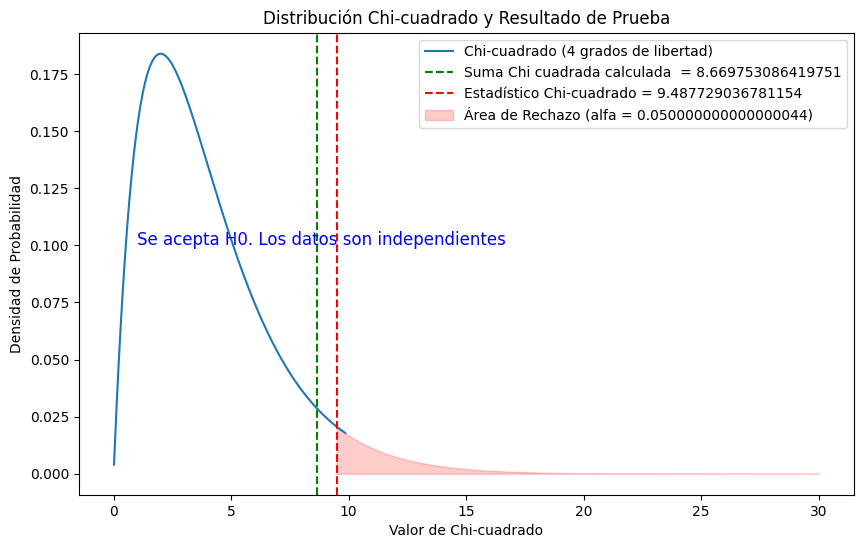

In [93]:
datos = np.array([0.275, 0.277, 0.016, 0.455, 0.489, 0.735, 0.085, 0.159, 0.553, 0.857,
                  0.819, 0.436, 0.494, 0.450, 0.450, 0.873, 0.910, 0.577, 0.232, 0.768,
                  0.106, 0.967, 0.426, 0.607, 0.766, 0.623, 0.228, 0.346, 0.781, 0.027,
                  0.260, 0.345, 0.681, 0.433, 0.748, 0.986, 0.723, 0.837, 0.903, 0.306,
                  0.436, 0.601, 0.523, 0.028, 0.503, 0.024, 0.071, 0.748, 0.836, 0.281])


datos

# Establece los umbrales, li ls entre 0 y 1
li = 0.400
ls = 0.800

# Crea la secuencia binaria
secuencia = f_secuencia(datos, li, ls )
n = len(secuencia)
print(n)
print(secuencia)

# Huecos
huecos, cuantos_ceros, = f_huecos(secuencia)
print("Número de huecos entre unos :", huecos)
print("Cuántos y como están la frecuencia de huecos ceros")
print(cuantos_ceros)

# Tabla
tabla, suma_chi_cuad = f_tabla_frec_huecos(cuantos_ceros, li, ls)
print(tabla)
print ("Suma de chi_cuadi", suma_chi_cuad)

# Calcular el estadístico de prueba de chi cuadrada
confianza = 0.95
alfa_significancia = 1 - confianza

gl = intervalos = len(tabla) - 1 # Par ael valor de grados de libertad
valor_prueba_chi = chi2.ppf(1 - alfa_significancia, df=gl)
print("valor_prueba_chi:", valor_prueba_chi)

# Realizar el contraste
H0 = "Los datos son independientes"
Ha = "Los datos no son independientes"

if suma_chi_cuad < valor_prueba_chi:
    decision = f"Se acepta H0. {H0}"
else:
    decision = f"Se rechaza H0 y se acepta Ha. {Ha}"

print(decision)

# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi_cuad, valor_prueba_chi, gl, alfa_significancia)


¡Efectivamente!, son muy aleatorios con pesos que no están en un patrón de entre un peso menor y mayor (0.400 y 0.800 kgs).

# Interpretación

La prueba estadística de **huecos** sirve para evaluar la aleatoriedad e independencia de los datos.

Para hacer la prueba de huecos se debe asegurar que los datos estén entre $0$ y $1$ y que el rango que define valores $\alpha$ y $\beta$ que se establezca también este entre $0$ y $1$. El rango lo define el analista investigador dependiendo de contexto y del análisis específico.

Se debe definir el nivel de confianza normalmente a un $95\%$ (pero puede ser otro valor) que establece un valor de alfa de $\alpha = 0.05$.

Se define la hipótesis nula mediante la afirmación $H_0:$ Los datos si son independientes y la $H_a:$ Los datos no son independientes.

En el método de prueba estadística de independencia si es menor el valor de la suma chi cuadrada calculada contra el valor de prueba chi se acepta $H_0$ de lo contrario se rechaza $H_0$**.

De acuerdo al contraste se toma la decisión de aceptar la $H_0$ de si los datos son independientes o de rechaza y concluir que los datos no son independientes.

El significado de que los datos sean independientes es que no presentan algún patrón entre ellos y provienen de fuentes aleatorias; por el contrario, si no son independientes entonces significa que existe algún patrón o asociación en los datos.

Finalmente, los resultados de la prueba e huecos puede depender del tamaño de la muestra y de la definición del rango de huecos.

La prueba de huecos se utiliza para evaluar la aleatoriedad e independencia de datos y detectar patrones no aleatorios.








